In [1]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# load nodes details
with open("fb-pages-food.nodes",encoding="cp437", errors='ignore') as f:
    fb_nodes = f.read().splitlines() 

# load edges (or links)
with open("fb-pages-food.edges",encoding="cp437", errors='ignore') as f:
    fb_links = f.read().splitlines() 

len(fb_nodes), len(fb_links)

(621, 2102)

In [3]:
# captture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(fb_links):
  node_list_1.append(i.split(',')[0])
  node_list_2.append(i.split(',')[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})
fb_df.head()

100%|██████████| 2102/2102 [00:00<00:00, 323182.81it/s]


node_1 node_2
0      0    276
1      0     58
2      0    132
3      0    603
4      0    398

In [4]:
# create graph
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 620
Number of edges: 2102
Average degree:   6.7806


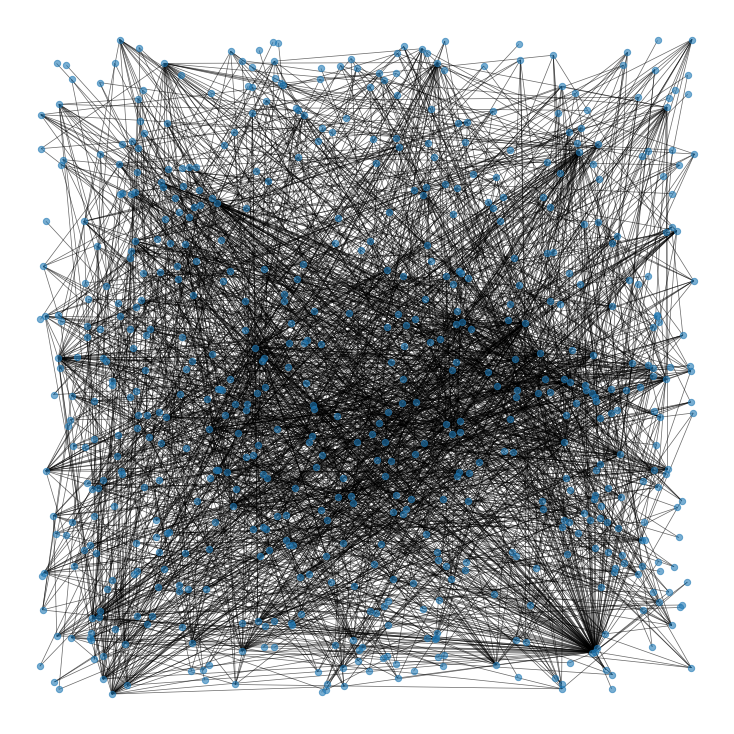

In [5]:
# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [6]:
nx.degree(G, '49')

6

In [7]:
nx.average_clustering(G)

0.3308970263553271

In [8]:
nx.shortest_path(G, '39', '49')

['39', '576', '155', '293', '49']

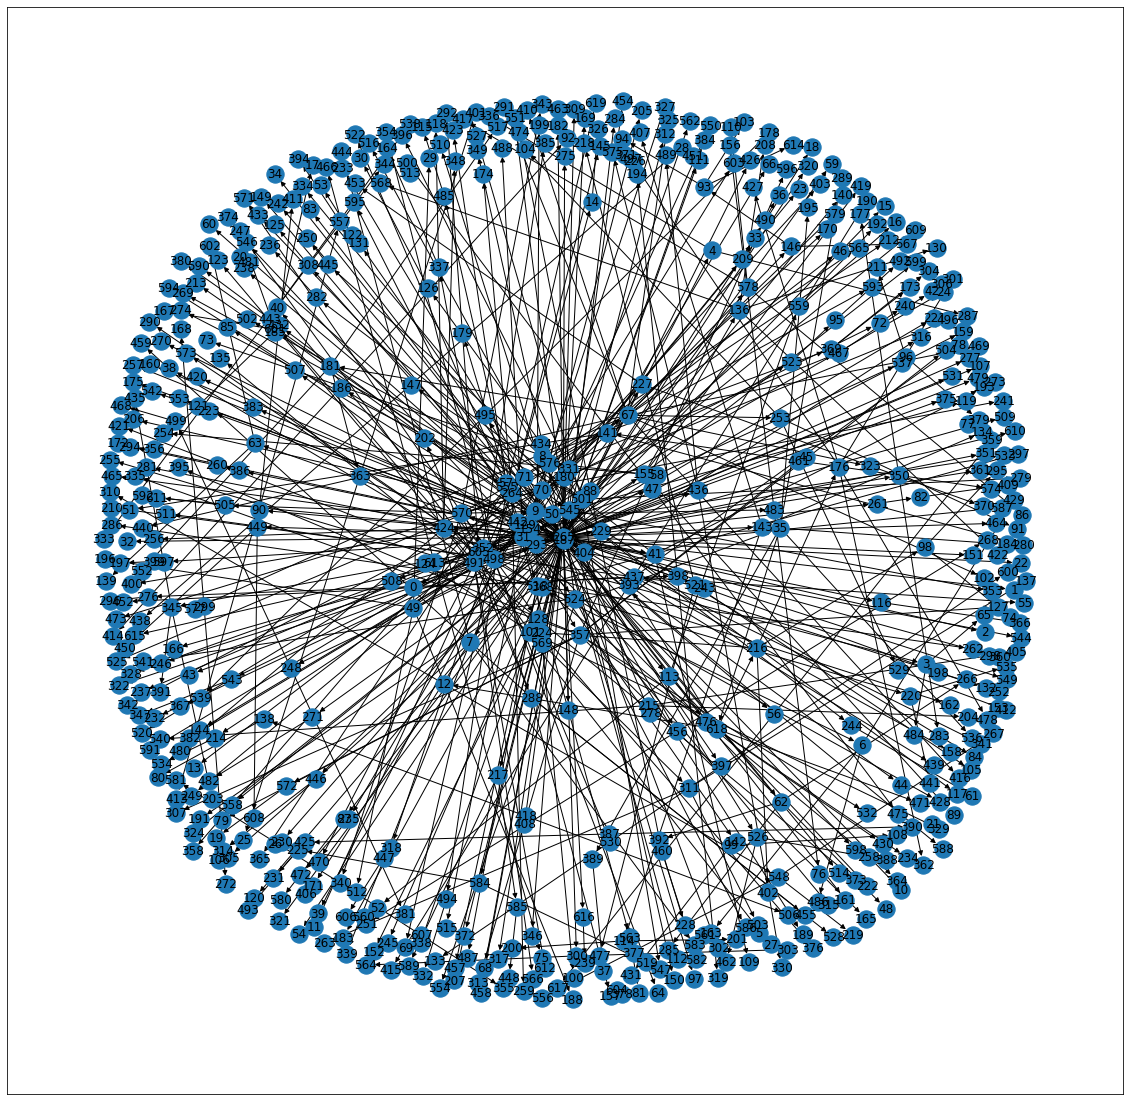

In [9]:
T = nx.bfs_tree(G, '49')
plt.figure(figsize=(20,20))
nx.spring_layout(T,seed=23)
nx.draw_networkx(T)
plt.show()

In [10]:
nx.eccentricity(G,'49')

12

In [11]:
d=nx.degree_centrality(G)
fb_df = pd.DataFrame({'node': node, 'degree centrality': d[node]} for node in d)
fb_df.head(n=25)

node  degree centrality
0     0           0.009693
1   276           0.017771
2    58           0.024233
3   132           0.003231
4   603           0.043619
5   398           0.014540
6   555           0.027464
7     1           0.003231
8   265           0.216478
9   611           0.075929
10    2           0.004847
11  182           0.050081
12  345           0.017771
13    3           0.016155
14  608           0.011309
15  377           0.016155
16   40           0.011309
17  352           0.030695
18  450           0.011309
19  484           0.004847
20  299           0.021002
21   65           0.012924
22  185           0.014540
23  228           0.003231
24  557           0.008078

In [12]:
c=nx.closeness_centrality(G) 
fb_df = pd.DataFrame({'node': node, 'closeness centrality': c[node]} for node in c)
fb_df.head(n=25)

node  closeness centrality
0     0              0.233673
1   276              0.193196
2    58              0.273531
3   132              0.227323
4   603              0.269599
5   398              0.194349
6   555              0.206678
7     1              0.249095
8   265              0.331370
9   611              0.302838
10    2              0.251524
11  182              0.267734
12  345              0.254523
13    3              0.228582
14  608              0.230454
15  377              0.209617
16   40              0.220050
17  352              0.277952
18  450              0.230454
19  484              0.189470
20  299              0.212204
21   65              0.201563
22  185              0.212059
23  228              0.187235
24  557              0.238169

In [13]:
b=nx.betweenness_centrality(G) 
fb_df = pd.DataFrame({'node': node, 'betweenness centrality': b[node]} for node in b)
fb_df.head(n=25)

node  betweenness centrality
0     0                0.028408
1   276                0.006052
2    58                0.034414
3   132                0.000265
4   603                0.016790
5   398                0.011679
6   555                0.055709
7     1                0.000000
8   265                0.349908
9   611                0.034436
10    2                0.000000
11  182                0.008884
12  345                0.010106
13    3                0.006739
14  608                0.005274
15  377                0.003763
16   40                0.005572
17  352                0.036894
18  450                0.005274
19  484                0.000003
20  299                0.009642
21   65                0.000989
22  185                0.004786
23  228                0.000124
24  557                0.003259

In [14]:
e= nx.eigenvector_centrality(G) 
fb_df = pd.DataFrame({'node': node, 'eigen_vector centrality': e[node]} for node in e)
fb_df.head(n=25)

node  eigen_vector centrality
0     0                 0.008551
1   276                 0.000539
2    58                 0.075996
3   132                 0.006313
4   603                 0.116762
5   398                 0.000514
6   555                 0.002373
7     1                 0.021565
8   265                 0.325752
9   611                 0.184939
10    2                 0.020565
11  182                 0.124655
12  345                 0.036604
13    3                 0.002750
14  608                 0.001381
15  377                 0.000781
16   40                 0.002470
17  352                 0.053558
18  450                 0.001381
19  484                 0.000267
20  299                 0.002160
21   65                 0.000498
22  185                 0.002443
23  228                 0.000177
24  557                 0.020996

(-0.04868933605030179,
 1.0461679683066905,
 -0.04937998184759636,
 1.048613464893424)

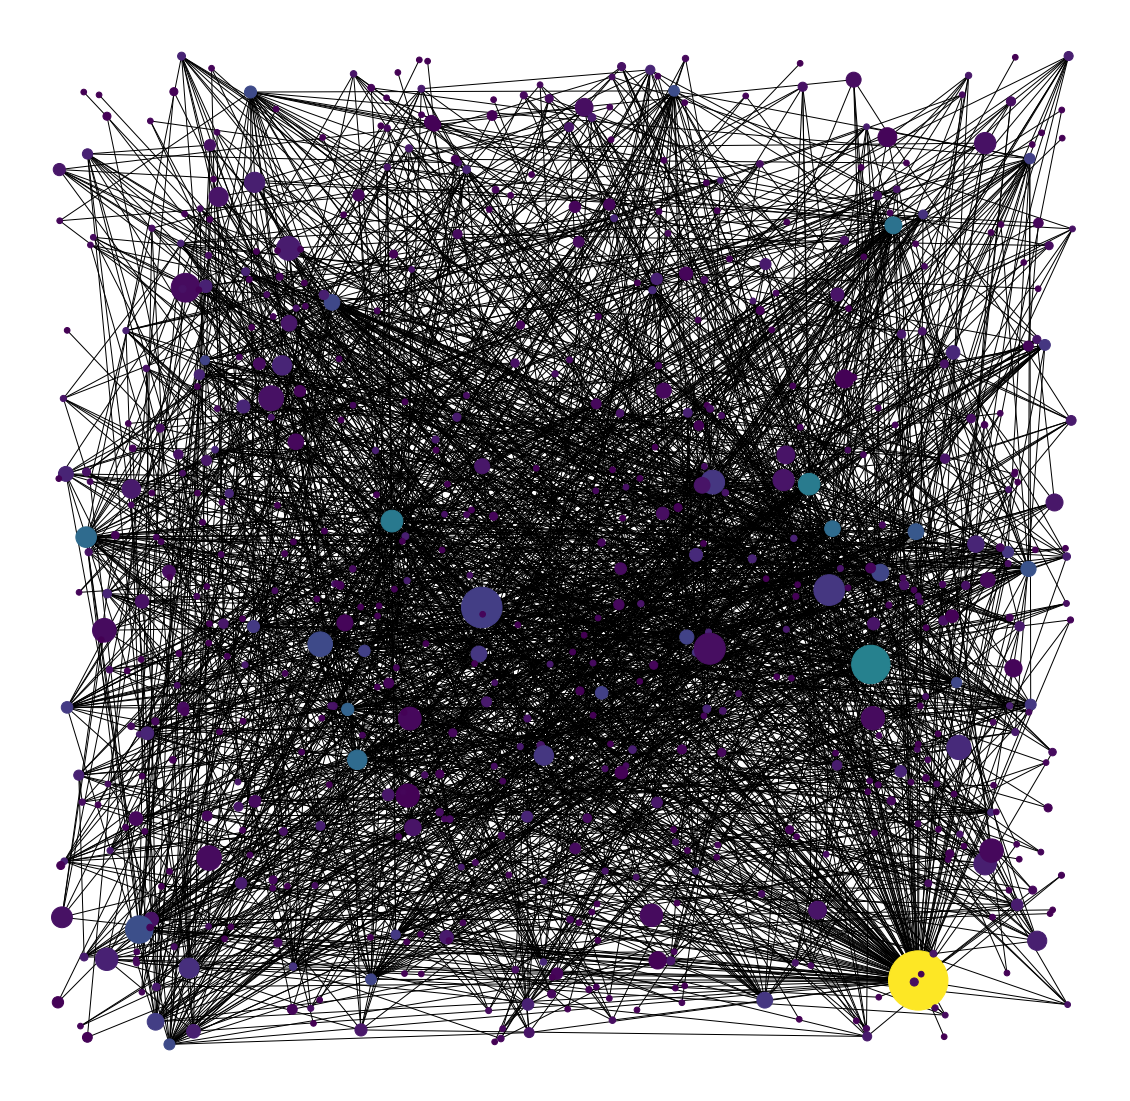

In [15]:
pos = nx.random_layout(G, seed=23)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [16]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['265', '31', '518', '618', '35']

In [17]:
sorted(e, key=e.get, reverse=True)[:5]

['265', '90', '340', '67', '56']

In [18]:
sorted(c, key=c.get, reverse=True)[:5]

['265', '611', '70', '90', '56']

In [19]:
%matplotlib inline
def draw(G, pos, measures, measure_name):
    plt.figure(figsize=(15,10))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=40,alpha=0.8, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')

    plt.show()

In [20]:
fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})
fb_df.head()
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())
pos = nx.random_layout(G, seed=23)

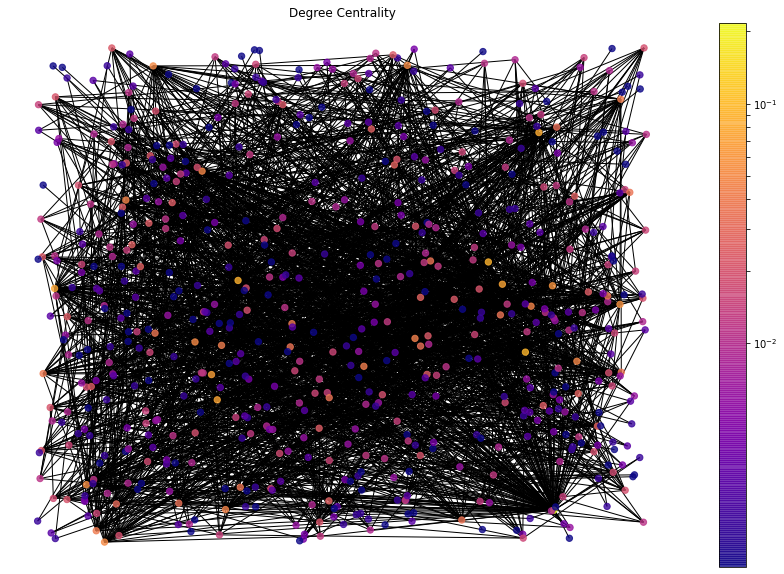

In [21]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

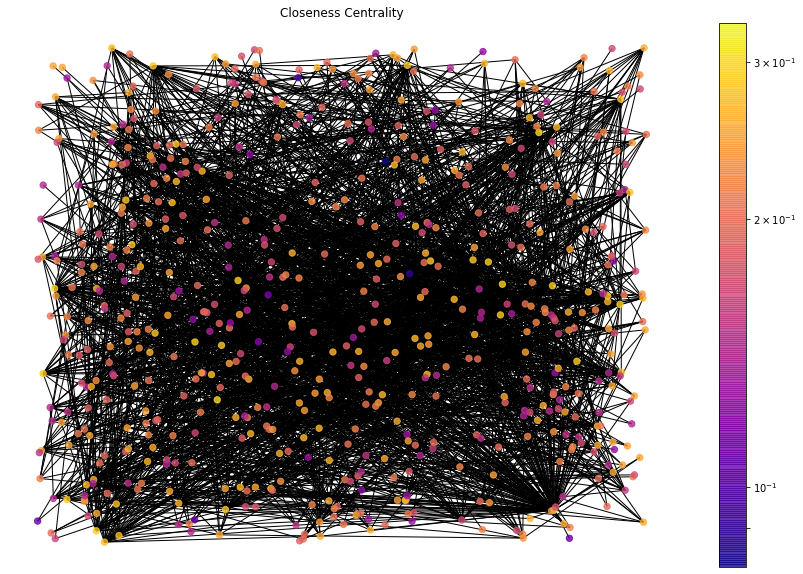

In [22]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

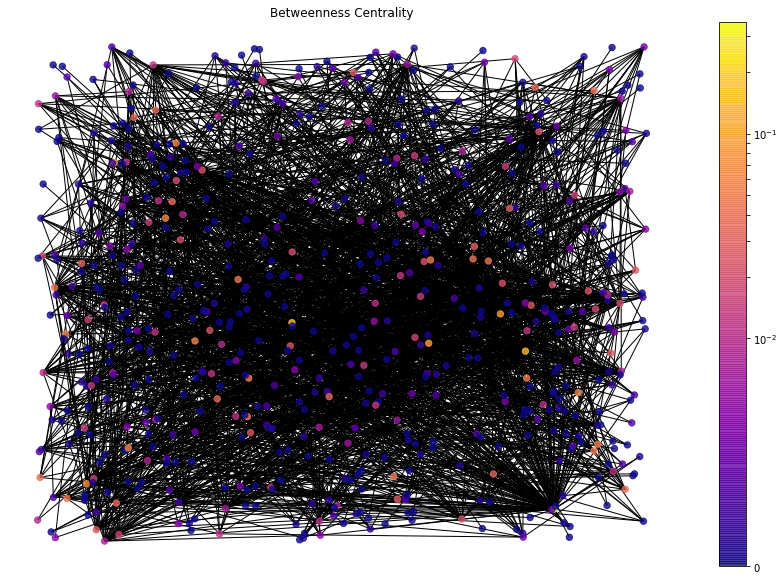

In [23]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

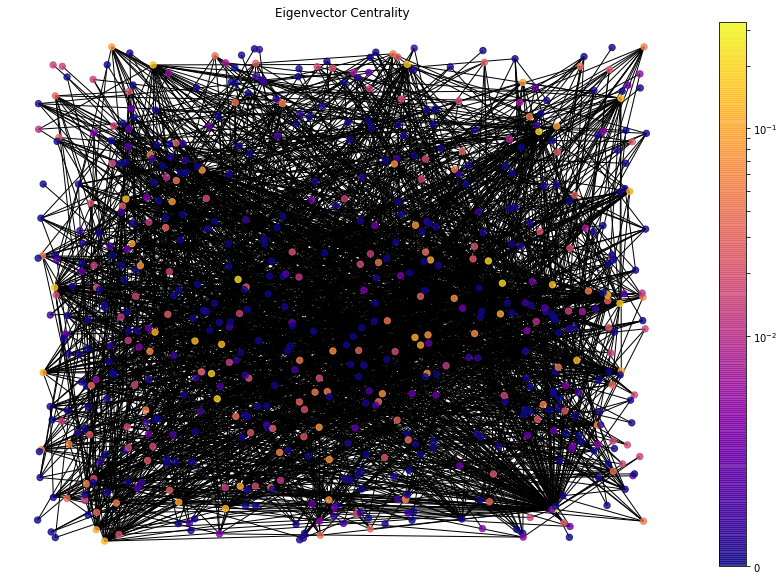

In [24]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

In [25]:
dict={'Closeness Centrality':sorted(c, key=c.get, reverse=True)[:25],
      'Betweenness Centrality':sorted(betCent, key=betCent.get, reverse=True)[:25],
      'Eigen Vector Centrality':sorted(e, key=e.get, reverse=True)[:25]}
df = pd.DataFrame(dict)
df.head(n=25)

Closeness Centrality Betweenness Centrality Eigen Vector Centrality
0                   265                    265                     265
1                   611                     31                      90
2                    70                    518                     340
3                    90                    618                      67
4                    56                     35                      56
5                   217                    216                     611
6                   505                    498                      89
7                    67                    101                      70
8                   340                    217                     317
9                   248                    148                     505
10                   41                    555                     288
11                  317                    449                       9
12                   87                    434                     229
13                  288                      8                      87
14                  198                    605                     198
15                  449                    585                     131
16                  131                     57                     217
17                   35                    243                     289
18                  434                    264                     182
19                  169                     41                     601
20                  597                    521                     603
21                  601                    340                     597
22                   89                     67                     350
23                  465                    220                     248
24                  229                    169                     616

In [26]:
# combine all nodes in a list
node_list = node_list_1 + node_list_2

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

# build adjacency matrix
adj_G = nx.to_numpy_matrix(G, nodelist = node_list)

In [27]:
adj_G.shape

(620, 620)

In [28]:
# get unconnected node-pairs
all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
  for j in range(offset,adj_G.shape[1]):
    if i != j:
      if nx.shortest_path_length(G, str(i), str(j)) <=2:
        if adj_G[i,j] == 0:
          all_unconnected_pairs.append([node_list[i],node_list[j]])

  offset = offset + 1

100%|██████████| 620/620 [00:19<00:00, 32.61it/s] 


In [29]:
len(all_unconnected_pairs)

19018

In [30]:
node_1_unlinked = [i[0] for i in all_unconnected_pairs]
node_2_unlinked = [i[1] for i in all_unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

In [31]:
initial_node_count = len(G.nodes)

fb_df_temp = fb_df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(fb_df.index.values):
  
  # remove a node pair and build a new graph
  G_temp = nx.from_pandas_edgelist(fb_df_temp.drop(index = i), "node_1", "node_2", create_using=nx.Graph())
  
  # check there is no spliting of graph and number of nodes is same
  if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
    omissible_links_index.append(i)
    fb_df_temp = fb_df_temp.drop(index = i)

100%|██████████| 2102/2102 [00:17<00:00, 122.37it/s]


In [32]:
len(omissible_links_index)

1483

In [33]:
# create dataframe of removable edges
fb_df_ghost = fb_df.loc[omissible_links_index]

# add the target variable 'link'
fb_df_ghost['link'] = 1

data = data.append(fb_df_ghost[['node_1', 'node_2', 'link']], ignore_index=True)

In [34]:
data['link'].value_counts()

0    19018
1     1483
Name: link, dtype: int64

In [35]:
# drop removable edges
fb_df_partial = fb_df.drop(index=fb_df_ghost.index.values)

# build graph
G_data = nx.from_pandas_edgelist(fb_df_partial, "node_1", "node_2", create_using=nx.Graph())

In [36]:
!pip install node2vec

In [37]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:34<00:00,  1.47it/s]


In [38]:
x = [(n2w_model[str(i)]+n2w_model[str(j)]) for i,j in zip(data['node_1'], data['node_2'])]

<ipython-input-38-621e060f11b3>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  x = [(n2w_model[str(i)]+n2w_model[str(j)]) for i,j in zip(data['node_1'], data['node_2'])]


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(x), data['link'], 
                                                test_size = 0.3, 
                                                random_state = 35)

In [41]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

C:\Users\Alpanshu Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [42]:
predictions = lr.predict_proba(xtest)

In [43]:
roc_auc_score(ytest, predictions[:,1])

0.7996240149564944

In [44]:
!pip3 install lightgbm

In [45]:
import lightgbm as lgbm

In [46]:
train_data = lgbm.Dataset(xtrain, ytrain)
test_data = lgbm.Dataset(xtest, ytest)

# define parameters
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'num_threads' : 2,
    'seed' : 76
}

# train lightGBM model
model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=20)

[LightGBM] [Info] Number of positive: 1062, number of negative: 13288
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 14350, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.074007 -> initscore=-2.526707
[LightGBM] [Info] Start training from score -2.526707
[1]	valid_0's auc: 0.763072
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.784782
[3]	valid_0's auc: 0.797895
[4]	valid_0's auc: 0.807709
[5]	valid_0's auc: 0.820192
[6]	valid_0's auc: 0.827815
[7]	valid_0's auc: 0.836509
[8]	valid_0's auc: 0.843345
[9]	valid_0's auc: 0.846606
[10]	valid_0's auc: 0.852411
[11]	valid_0's auc: 0.85612
[12]	valid_0's auc: 0.861182
[13]	valid_0's auc: 0.862419
[14]	valid_0's auc: 0.863394
[15]	valid_0's auc: 0.865764
[16]	valid_0's a

In [47]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

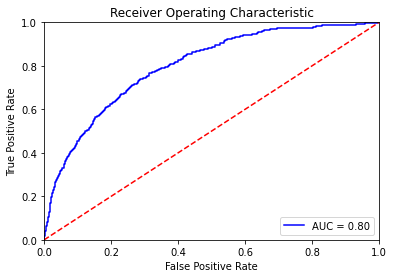

In [48]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lgbm.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

AttributeError: module 'lightgbm' has no attribute 'predict_proba'